# Detect non-stationarity
### Test for the null-hypothesis - it is non-stationary

In [6]:
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from matplotlib import rcParams
import pandas as pd


## car accelerating example

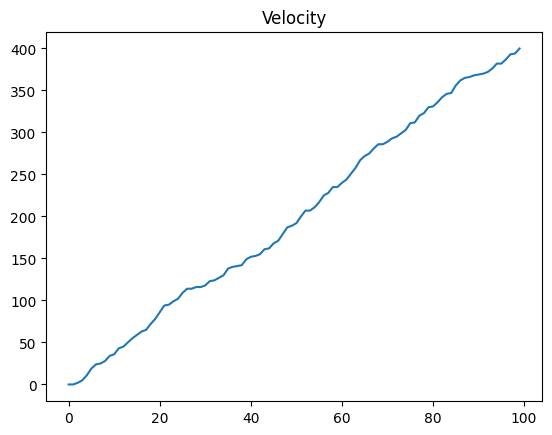

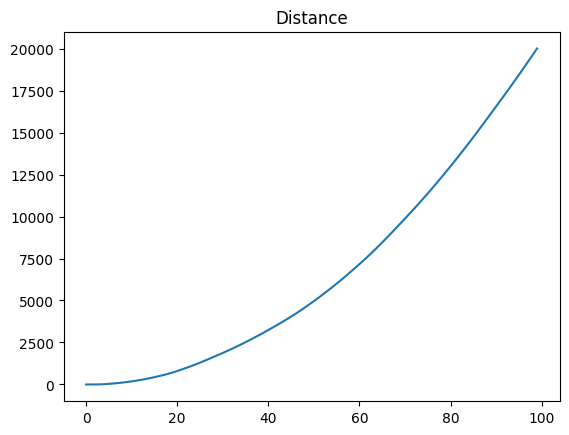

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
# car acclearation is constant over time 
acclearation = 5
# time is in seconds calculate veclocity after 100 seconds
time = 100
t = 1
# initial velocity is 0
velocity = np.zeros(time)
# calculate velocity
for t in range(1,100):
    velocity[t] = velocity[t-1] + acclearation + np.random.randint(-5,5)
sns.lineplot(x=range(time), y=velocity)
plt.title('Velocity')
plt.show()
# get distance array 100 elements
distance = np.zeros(time)

for t in range(1,100):
    # add random noise as integer betwee 1 and 10 to velocity  to make it non-stationary
    distance[t] += distance[t-1] + velocity[t]

sns.lineplot(x=range(time), y=distance)
plt.title('Distance')
plt.show()
# write out  time and distance to csv with time as index 
df = pd.DataFrame({'time':range(time), 'data':distance})

df.to_csv('data00.csv', index=False)


In [8]:
# download data from sydney airport temperature 
# https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df.head()
#write it out to a csv file 
df.to_csv('daily-temperatures.csv')


/tmp/ipykernel_4348/236866395.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


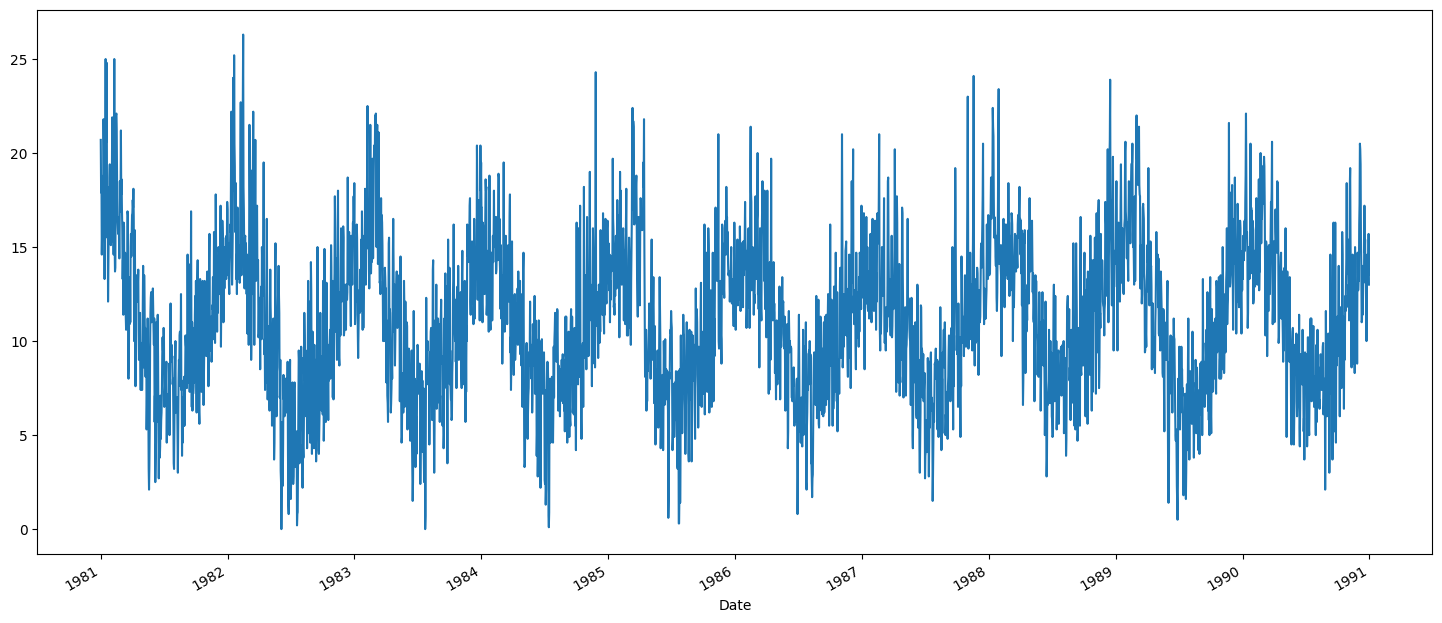

In [58]:
df.plot()
plt.show()

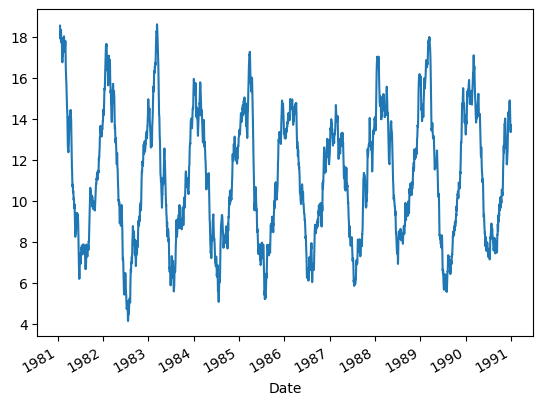

In [9]:
# generate a moving average plot
df.rolling(window=20).mean().plot()
plt.show()

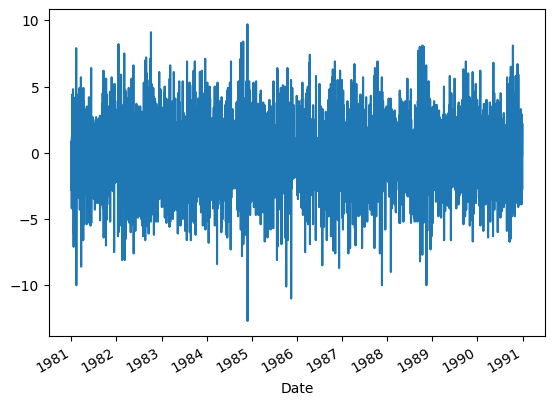

ADF Statistic: -18.028224
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [10]:
# remove seasonality using differencing peroid = 1
# difference(t) = observation(t) - observation(t-1)
# to make preditction/inverted(t) we need an observation at t-1 and a predicted difference value at t 
# inverted(t) = differenced(t) + observation(t-1)
df_diff = df.diff(periods=1)
df_diff.plot()
plt.show()
# test for stationarity
result = adfuller(df_diff.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    

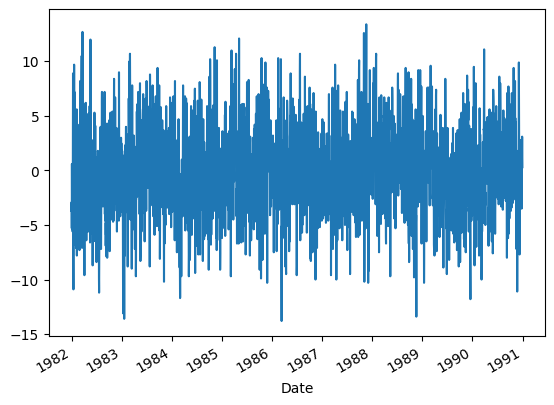

p-value: 0.000000


In [11]:
# remove annual seasonality using differencing peroid = 365
df_diff = df.diff(periods=365)
df_diff.plot()
plt.show()
# test for stationarity
result = adfuller(df_diff.dropna())
# print p-value

print('p-value: %f' % result[1])

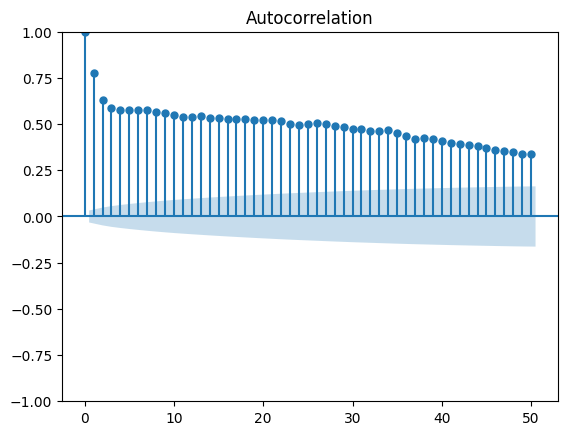

In [15]:
# plot aurocorrelation function for various lags 
# import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt

sgt.plot_acf(df[1:], lags=50)
plt.show()

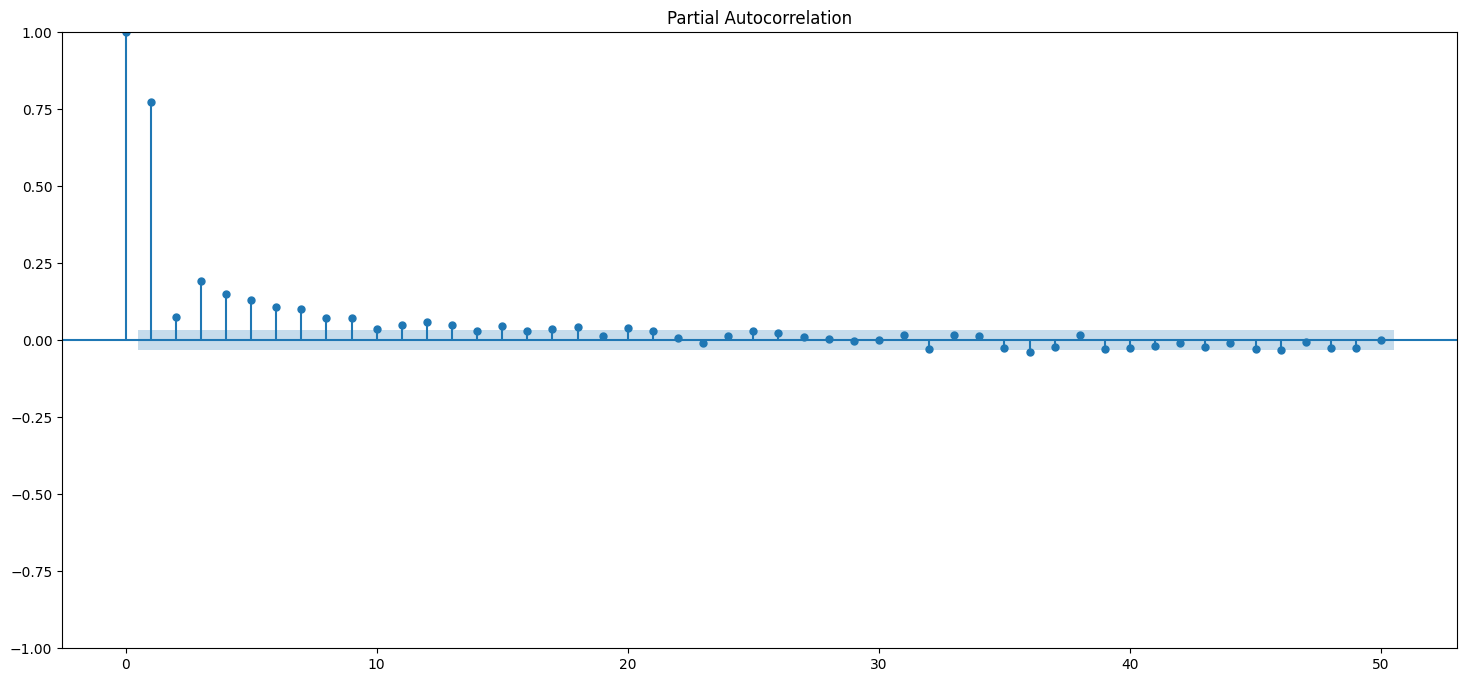

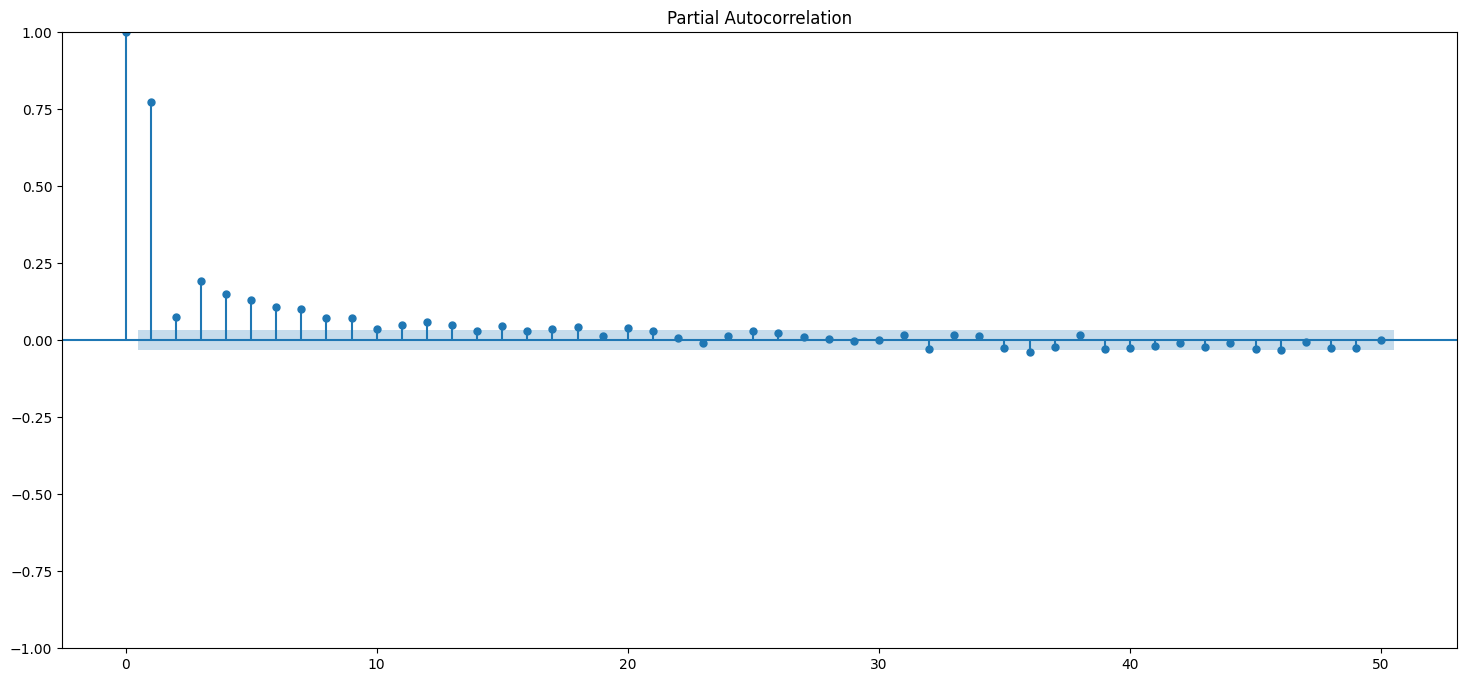

In [64]:
# plot partial aurocorrelation function for various lags
#The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df[1:], lags=50)

In [3]:

tps_july = pd.read_csv(
    "train.csv", parse_dates=["date_time"], index_col="date_time"
)
test_results = adfuller(tps_july["target_carbon_monoxide"])

test_results[1]




7.263413572494168e-15

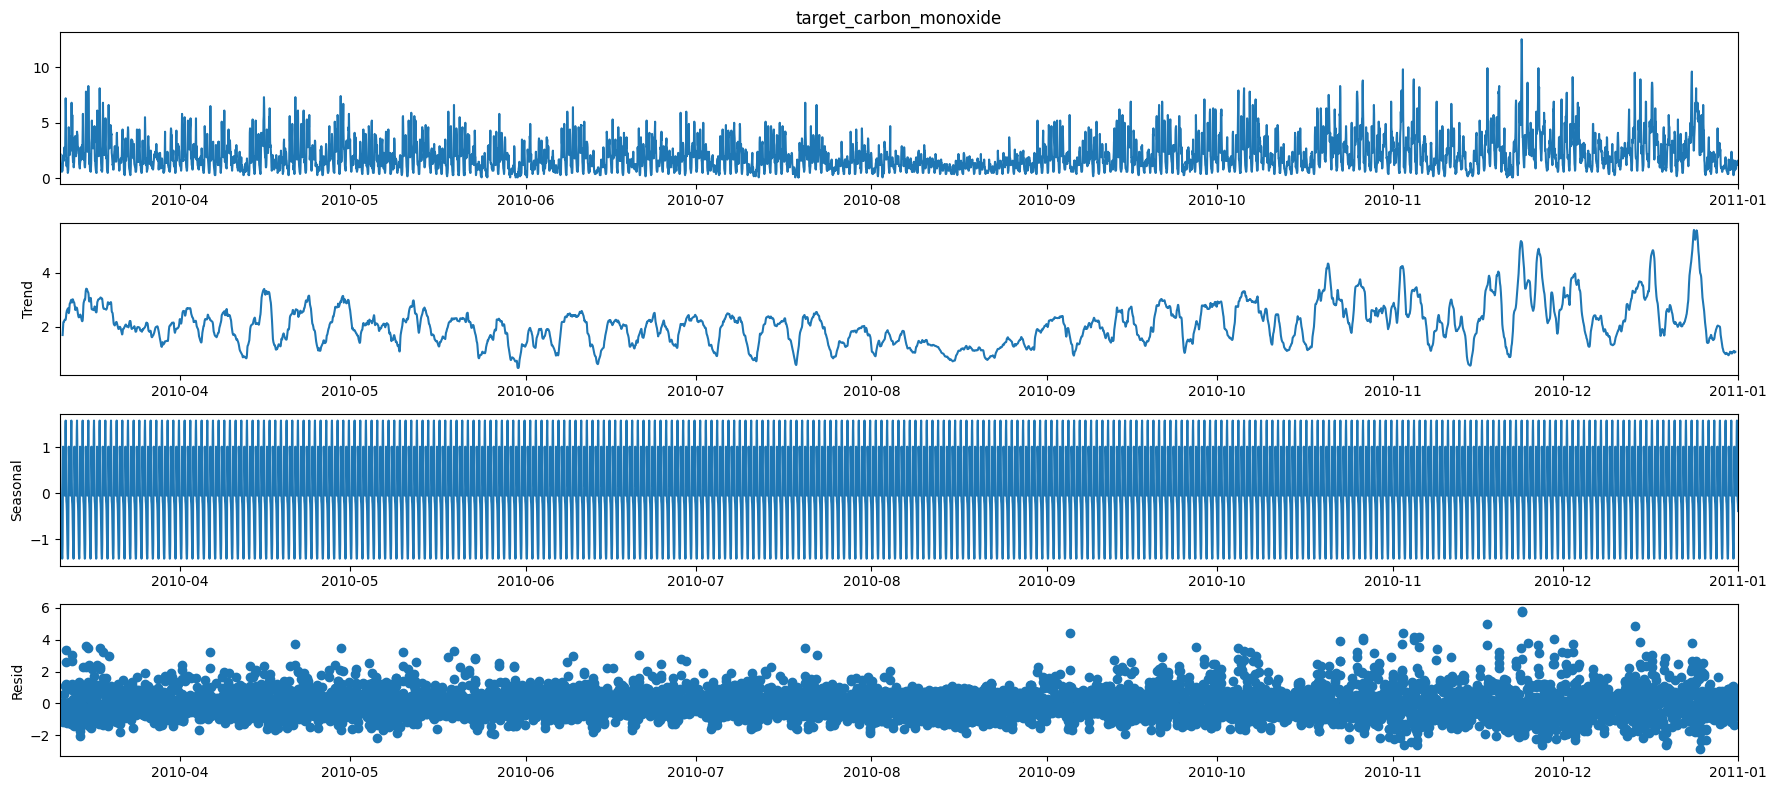

In [4]:
# plot seasonal decomposition
rcParams["figure.figsize"] = 18, 8
decomposition = sm.tsa.seasonal_decompose(tps_july["target_carbon_monoxide"], model="additive")
fig = decomposition.plot()

# Load stock price data

<Axes: xlabel='Date'>

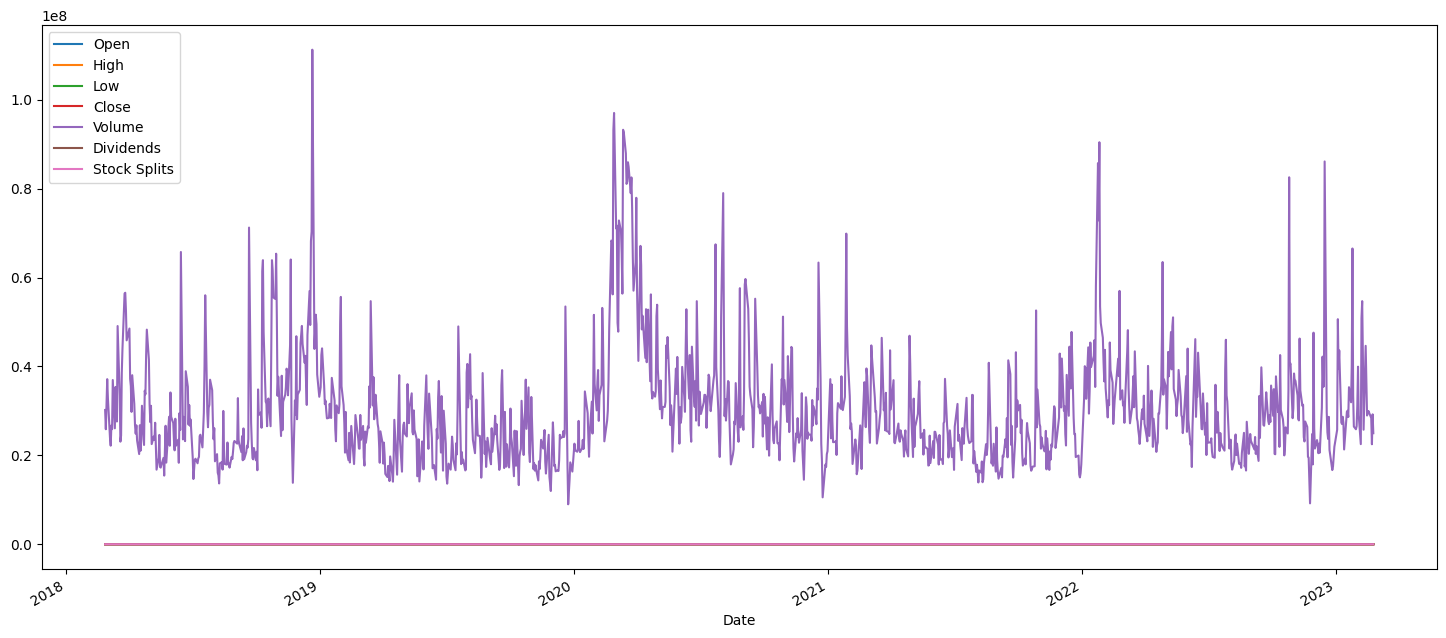

In [36]:
# load msft5yr.csv and plot the data
msft = pd.read_csv("msft5yr.csv", parse_dates=["Date"], index_col="Date")
msft.plot()


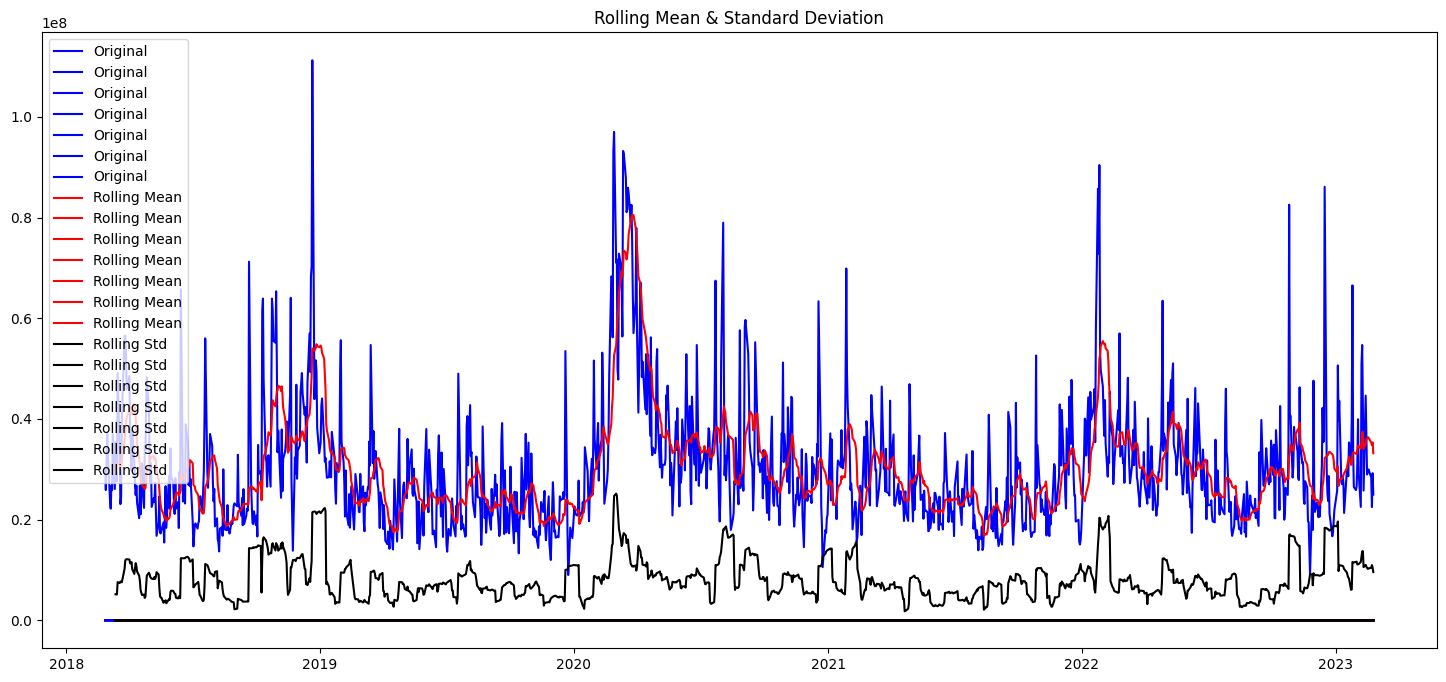

In [37]:
# plot the rolling mean and standard deviation
import matplotlib.pyplot as plt
rolmean = msft.rolling(window=12).mean()
rolstd = msft.rolling(window=12).std()
orig = plt.plot(msft, color="blue", label="Original")
mean = plt.plot(rolmean, color="red", label="Rolling Mean")
std = plt.plot(rolstd, color="black", label="Rolling Std")
plt.legend(loc="best")
plt.title("Rolling Mean & Standard Deviation")
plt.show(block=False)


In [34]:
# perform the Dickey-Fuller test and print the p-value (p-value > 0.05) -> non-stationary
test_results = adfuller(msft["Close"])
test_results[1]
print("p-value: ", test_results[1])


p-value:  0.6485027366514559


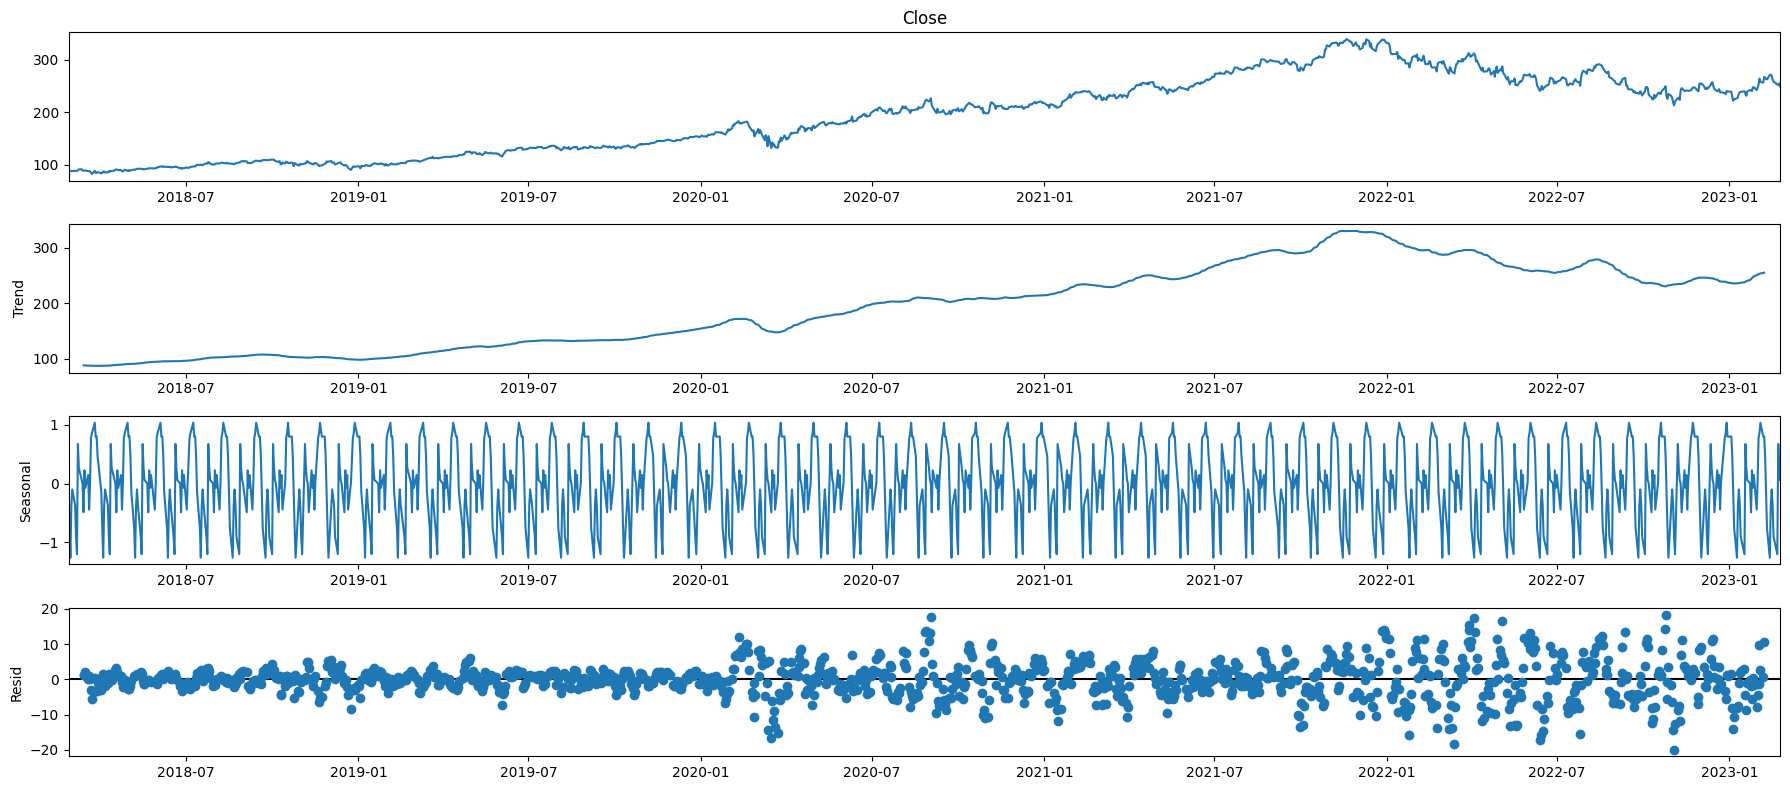

In [49]:
# is there a seasonal component?
#check if there is a seasonal component of msft["Close"]
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(msft["Close"], model="additive", period=24    ).plot()
plt.show()





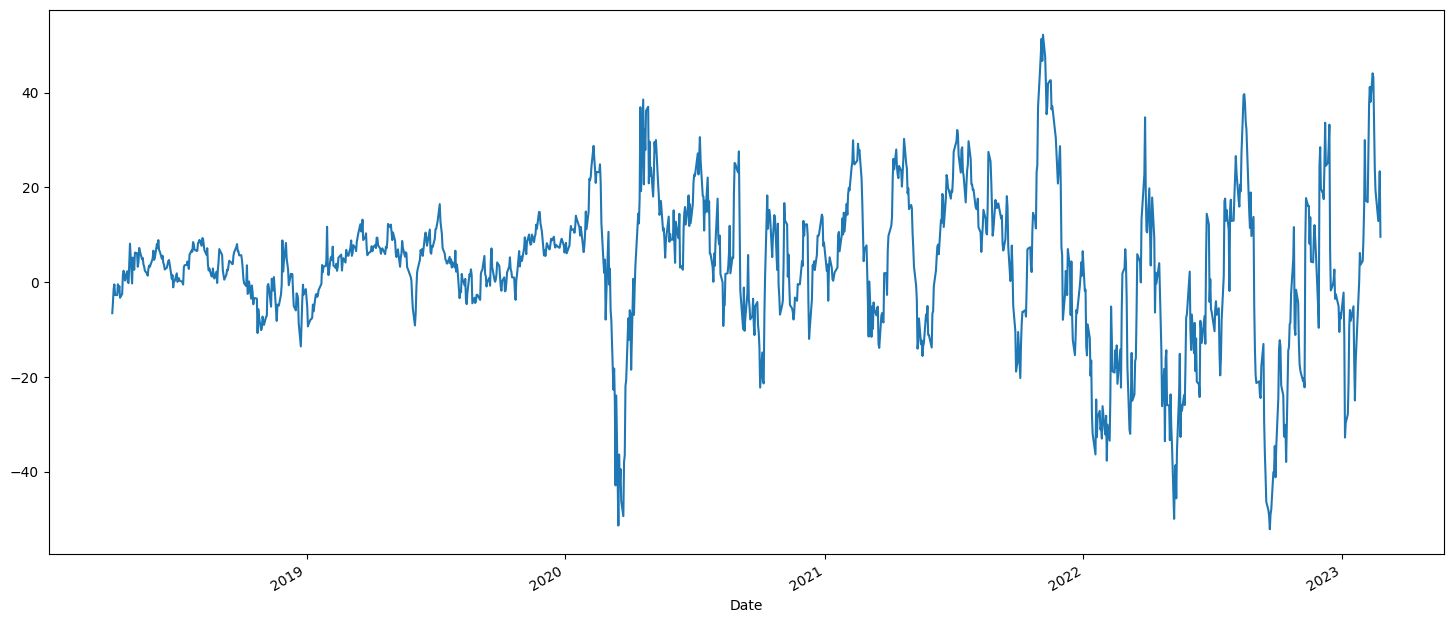

In [51]:
# remove seasonality
# remove the seasonal component from msft["Close"]
msft["Close"].diff(periods=24).plot()
plt.show()

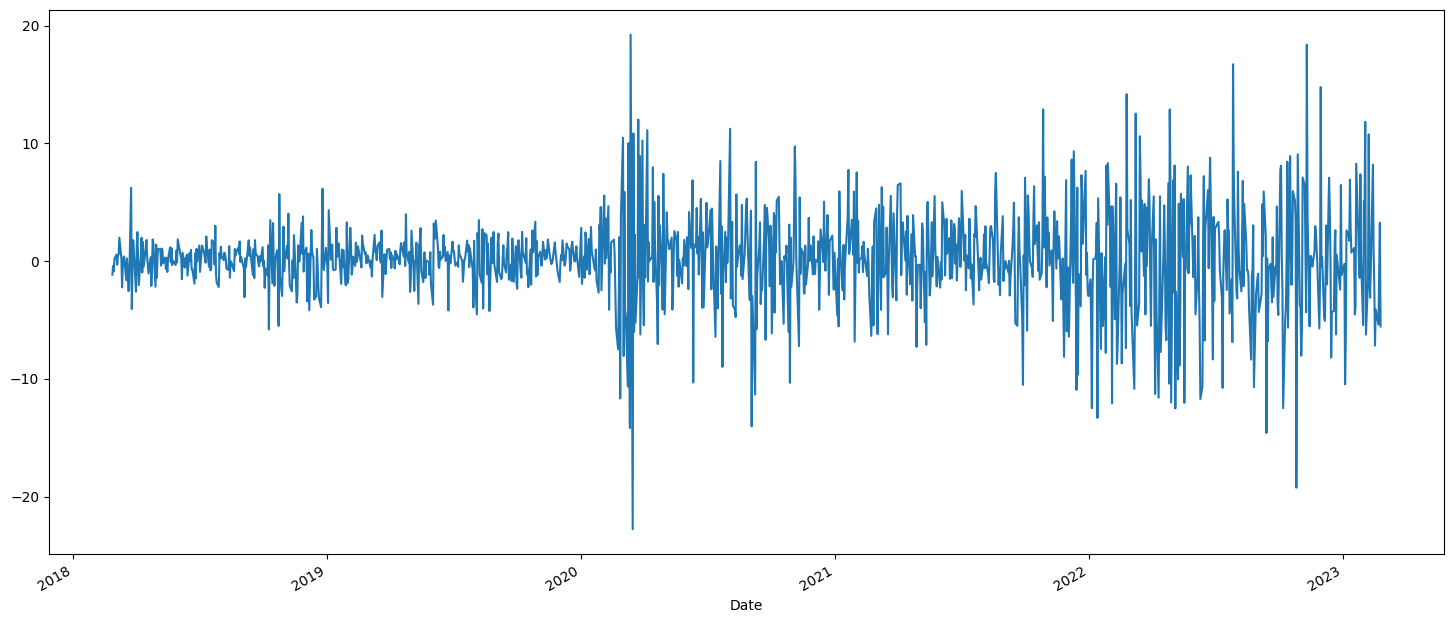

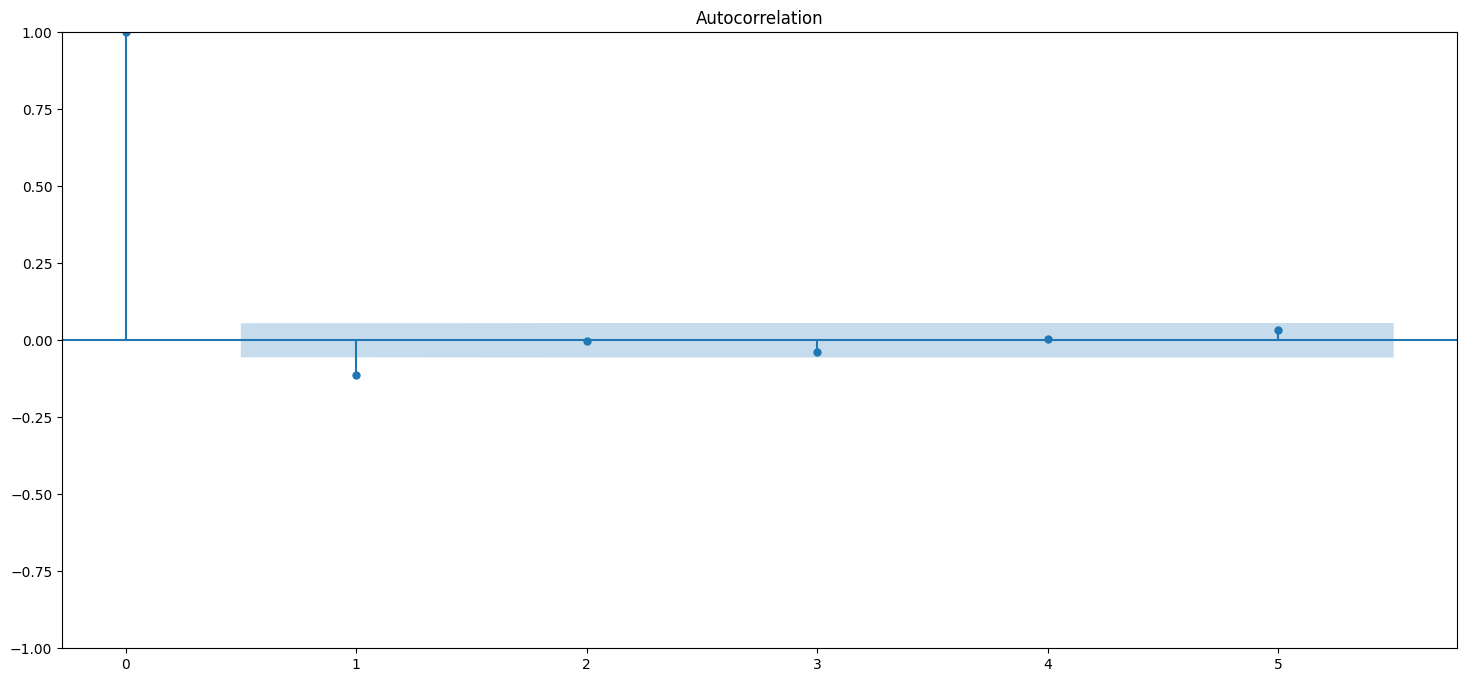

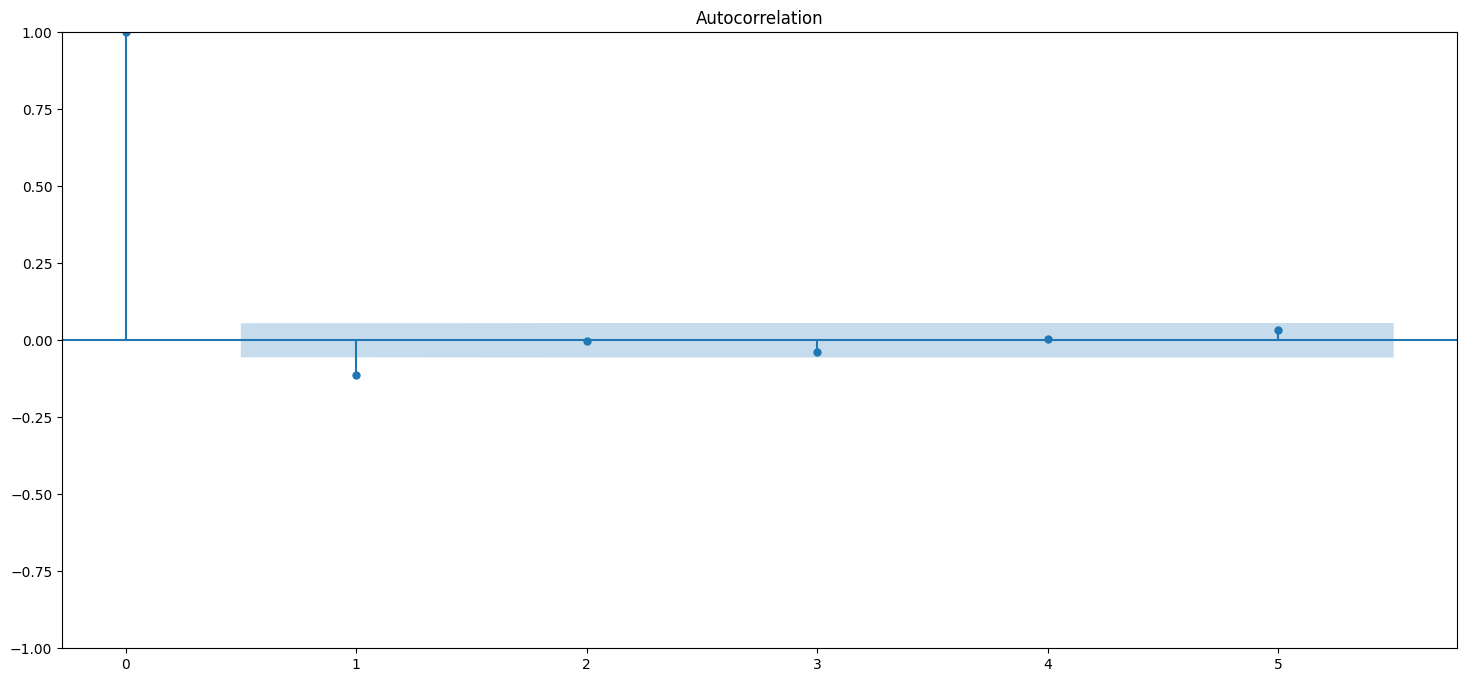

Bad pipe message: %s [b"\x01\xc0\x84g\xda\xff\xbdY\x96\x9c/\xb3\xcb\xbfxyS\x96 '5\xefV\x1d\x8eL\\\\\x8f\\\xfc\x8f\xac\xbb\r W\xb7V\x89\x8f\x9a\x07-,\xf9{GH\xd2", b'\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b']
Bad pipe message: %s [b'\x08\x05\x08\x06\x04\x01\x05']
Bad pipe message: %s [b'']
Bad pipe message: %s [b'']
Bad pipe message: %s [b"\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 \x14'f:\xf1\x92\x15\xd5\xde\xf3\x7fr\xc5=\x87C\xa6\x1d\xccF\xec\xcc"]
Bad pipe message: %s [b'\xec\x0f\xc3\xee\x99\xfd:\xf3\xaa\x8b\xfd\xa9t\xb0y\xd9\x98\xd9\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc

In [55]:
# difference the data msft close and plot the autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
msft_diff = msft["Close"].diff(periods=1)
msft["Close"].diff(periods=1).plot()
plt.show()
plot_acf(msft_diff.dropna(), lags=5)


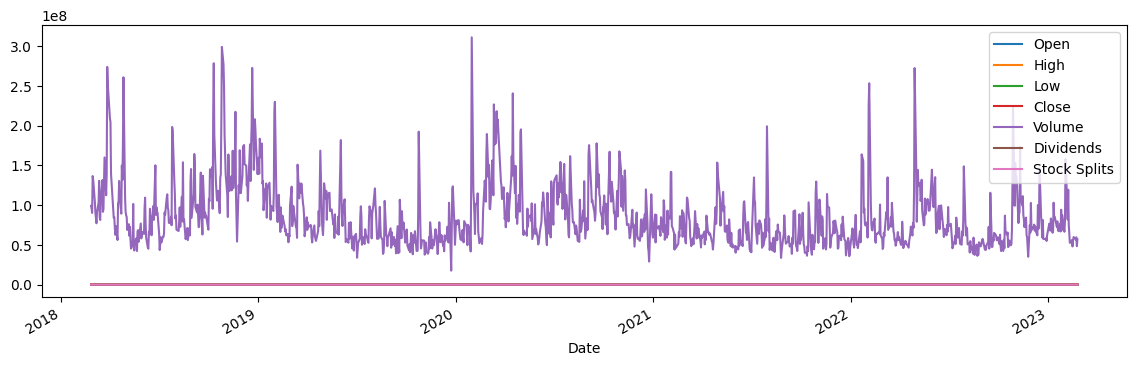

In [23]:
amzn = pd.read_csv(
    "amzn5yr.csv",
    parse_dates=["Date"],
    index_col="Date",
)

amzn.plot(figsize=(14, 4));